# Exercise 3 | TKO_2096 Applications of Data Analysis 2022

## Water permeability prediction in forestry <br>

In this task, the client wants you to estimate the spatial prediction performance of K-nearest neighbor regression model with K=7 (7NN), using spatial leave-one-out cross-validation (i.e. SKCV, with number of folds == number of data points). The client wants you to use the C-index as the performance measure.  

In other words, the client wants you to answer the question: "What happens to the prediction performance of water permeability using 7-nearest neighbor regression model, when the geographical distance between known data and unknown data increases?".

In this task, you have three data files available (with 1691 data points): 

- input.csv, contains the 75 predictor features. 
- output.csv, contains the water permebility values. 
- coordinates.csv, contains the corresponding geographical coordinate locations of the data points. The unit of the coordinates is metre, and you can use Euclidean distance to calculate distances between the coordinate points. 

Implement the following tasks to complete this exercise:

********************************************

#### 1. Z-score standardize the predictor features (input.csv). 

#### 2. Perform spatial leave-one-out cross-validation with 7NN model for the provided data set (refer to the lectures 3.1.3 and 3.1.4 for help). Estimate the water permeability prediction performance (using 7NN model and C-index) with the following distance parameter values: d = 0, 10, 20, ..., 200 (that is, 10 meter intervals from 0m to 200m). 

#### 3. When you have calculated the C-index performance measure for each value of d, visualize the results with the C-index (y-axis) as a function of d (x-axis).

********************************************

Your .ipynb-file must include the following: 

- Your own implementation of the spatial leave-one-out cross-validation for the current task. Remember to also take advantage of earlier exercises (e.g. C-index). For the 7-nearest neighbor and Euclidean distance calculation you can use third-party libraries (e.g. Scikit-learn) if you want.  


- Plot of the graph C-index vs. distance parameter value. 


<br><br><br>
-- START IMPLEMENTING YOUR EXERCISE AFTER THIS LINE --
<br><br><br>

### Import necessary libraries

In [50]:
# In this cell, import all the libraries that you need. For example: 
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from scipy.spatial import distance
import matplotlib.pyplot as plt

### Read in the datasets

In [51]:
# In this cell, read the files input.csv, output.csv and coordinates.csv.
# Print out the dataset dimesions (i.e. number of rows and columns).
#
# Note that the coordinates are in EUREF-TM35FIN format, so you 
# can use the Euclidean distance to calculate the distance between two coordinate points. 

input = np.genfromtxt('data/input.csv', delimiter = ',')
output = np.genfromtxt('data/output.csv', delimiter = ',')
coordinates = np.genfromtxt('data/coordinates.csv', delimiter = ',')

print('Input:', input.shape)
print('Output:', output.shape)
print('Coordinates:', coordinates.shape)

Input: (1691, 75)
Output: (1691,)
Coordinates: (1691, 2)


### Standardization of the predictor features (input.csv)

In [52]:
# Standardize the predictor features (input.csv) by removing the mean and scaling to unit variance. 
# In other words, z-score the predictor features. You are allowed to use third-party libraries for doing this. 

input_z = np.asarray(StandardScaler().fit_transform(input))
# print(input_z[:5])

### Functions

In [53]:
# Include here all the functions (for example the C-index-function) that you need in order to implement the task.

# C-index score function from previous exercise
def cindex(true_labels, pred_labels):
    n = 0
    h_num = 0 
    for i in range(0, len(true_labels)):
        t = true_labels[i]
        p = pred_labels[i]
        for j in range(i+1, len(true_labels)):
            nt = true_labels[j]
            np = pred_labels[j]
            if (t != nt): 
                n = n + 1
                if (p < np and t < nt) or (p > np and t > nt): 
                    h_num += 1
                elif (p == np):
                    h_num += 0.5 
    cindx = h_num  /n
    return cindx

In [54]:
# Expected parameters: X = input, y = output
def skcv_cindex(X, y, d_matrix, delta, neighbors):
    preds = []
    for i in range(len(X)):
        # Point at i as test set
        X_test = X[i].reshape(1, -1)
        # Train sets formed from points where distance to the test point is greater than current delta
        X_train = X[d_matrix[i] > delta]
        y_train = y[d_matrix[i] > delta]
        # Basic kNN prediction calculating
        knn = KNeighborsRegressor(n_neighbors = neighbors, metric = 'euclidean')
        knn.fit(X_train, y_train)
        pred = knn.predict(X_test)
        preds.append(pred)
    # Calculate and return the C-index score
    return cindex(y, preds)

### Results for spatial leave-one-out cross-validation with 7-nearest neighbor regression model

In [55]:
# In this cell, run your script for the Spatial leave-One-Out cross-validation 
# with 7-nearest neighbor regression model and visualize the results as 
# requested in the task assignment.

# Use scipy.spatial.distance to calculate euclidean distances
d_matrix = distance.cdist(coordinates, coordinates, metric = 'euclidean')

# Prepare variables for loop
deltas = range(0, 201, 10)
cindex_scores = []

In [56]:
# Spatial LOOCV
# Execution can take a while
# Loop through all values for delta
for d in deltas:
    # SKCV using our function
    score = skcv_cindex(input_z, output, d_matrix, d, 7)
    # Add to list of scores
    cindex_scores.append(score)
    print(d)

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200


### Interpretation of the results

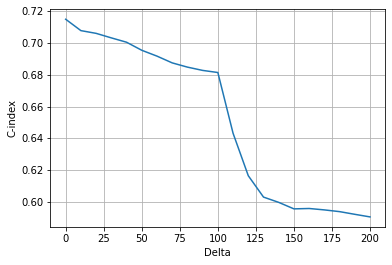

In [57]:
# In this cell, give a brief commentary on the results, what happens to the prediction 
# performance as the prediction distance increases?
plt.plot(deltas, cindex_scores)
plt.xlabel('Delta')
plt.ylabel('C-index')
plt.grid()

While 0 < delta <= 100 C-index score is ~70%

While delta > 100 C-index drops quickly just under 60%

Based on these results we can make a conclusion that increasing the distance between known and unknown data points will lead to lower prediction accuracy.